In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [3]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)
print(y[0])
print(X[0])

[1]
[ 1.53195873 60.17053988]


Use `least_squares` to compute w, and visualize the results.

NameError: name 'calculate_loss' is not defined

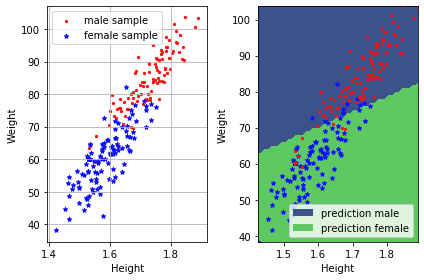

In [4]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y,tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    print(calculate_loss(y,tx,w))
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [ ]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    return 1 / (1 + np.exp(-t))

In [5]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    return np.sum(np.log(1+np.exp(tx.dot(w)))) - np.dot(y.T,tx.dot(w))

In [6]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T.dot(sigmoid(tx.dot(w))-y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [7]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y,tx,w)
    gradient = calculate_gradient(y,tx,w)
    w = w - gamma*gradient
    return loss, w

In [35]:
#MILOS VERSION TEST 
def sigmoid(x):
    """
    Function calculates the value of sigmoid function on the data structure x
    
    :param x: usulally this is X^T * w
    :type x: scalar or numpy 1D array or numpy 2D array
    
    :return: value of sigmoid function for that particular x
    :rtype:  float64
    
    """
    return 1/(1 + np.exp(-x))

def gradient_of_logistic_regression(tx,y,w,lambda_ = 0):
    """
    Function calculates the value of the gradient of the loss function for every
    i-th point of tx ( i in {0,...,(N-1)} )
    
    Function returns a vector, take a look at lecture 05b in Machine Learning:
        file name : lecture5b_logistic_regression.pdf --->    https://github.com/epfml/ML_course/blob/master/lectures/05/lecture5b_logistic_regression.pdf
        page : 10/17
    
    :param tx: extended (contains bias column) feature matrix, where each row is a datapoint and each          column a feature
    :type tx: numpy 2D array
    
    :param y: binary labels of our data
    :type y: numpy 1D array
    
    :param w: weight parameters for linear regression for every data point in tx
    :type w: numpy 1D array
    
    
    :return: the gradient vector for every data point i-th in tx ( i in {0,...,(N-1)} )
    in the logistic regression
    :rtype:  numpy 1D array
    
    """
    lin_reg = np.matmul(tx,w) # linear regression for every data point in tx
    hypothesis_vector = sigmoid(lin_reg) # just sigmoid applied to every entry of linear regression
    # calculate gradient vector with regularization (of course if lambda_ == 0 then it is without regularization)
    gradient_vector = np.matmul(np.transpose(tx), hypothesis_vector-y) + 2 * lambda_ * w
    return gradient_vector

def loss_of_logistic_regression(tx,y,w,lambda_ = 0):
    """
    Function calculates the value of the loss function for linear regression at the point tx
    
    Function returns a number float64, take a look at lecture 05b in Machine Learning:
        file name : lecture5b_logistic_regression.pdf --->    https://github.com/epfml/ML_course/blob/master/lectures/05/lecture5b_logistic_regression.pdf
        page : 07/17
    
    :param y: labels
    :type y: numpy 1D array
    
    :param tx: extended (contains bias column) feature matrix
    :type tx: numpy 2D array
    
    :param w: weights from linear regression
    :type w: numpy 1D array
    
    :return: the loss function calculated for every data point in tx and then summed up
    :rtype:  float64
    
    """
    # linear regression
    lin_reg = np.matmul(tx,w) 
    # log part of loss function
    log_lin_reg = np.logaddexp(0,lin_reg)  #  = log(1+ exp(lin_reg)) but avoids numerical instability issues
    # linear part of loss function
    # where y_i is zero that doesnt have any effect on the loss
    # where y_i is one that we subtract linear regression part
    y_lin_reg = y * lin_reg 
    loss = np.sum(log_lin_reg - y_lin_reg)
    return loss

def logistic_regression(y, tx, initial_w, max_iters, gamma):
    """
    #Logistic regression using gradient descent
    
    :param y: labels
    :type y: numpy 1D array
    
    :param tx: extended (contains bias column) feature matrix, where each row is a datapoint and each          column a feature
    :type tx: numpy 2D array
    
    :param initial_w: initial value of weights
    :type initial_w: numpy 1D array
    
    :param max_iters: the number of maximal iterations
    :type max_iters: int
    
    :param gamma: learning rate
    :type gamma: float64
    
    :return: ws (), losses (the value of the loss function at the end of learning)
    :rtype:  numpy array,  float64
    
    """
    loss = 0.0
    w = initial_w
    for n_iter in range(max_iters):
        # compute the gradient at the given point
        gradient = gradient_of_logistic_regression(tx,y,w)
        w = w - gamma * gradient
    # calculate loss function
    loss = loss_of_logistic_regression(tx,y,w)
    return w, loss

def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    """
    #Regularized logistic regression using gradient descent
    
    :param y: labels
    :type y: numpy 1D array
    
    :param lambda_: trade-off parameter (how big part of the loss/cost function to give to regularization function)
    :type lambda_: float64
    
    
    :param tx: extended (contains bias column) feature matrix, where each row is a datapoint and each          column a feature
    :type tx: numpy 2D array
    
    :param initial_w: initial value of weights
    :type initial_w: numpy 1D array
    
    :param max_iters: the number of maximal iterations
    :type max_iters: int
    
    :param gamma: learning rate
    :type gamma: float64
    
    :return: ws (), losses (the value of the loss function at the end of learning)
    :rtype:  numpy array,  float64
    
    """

    # Define parameters to store weights and the value of the loss(cost) funcion
    loss = 0.0
    w = initial_w
    for n_iter in range(max_iters):
        # compute the gradient at the given point
        gradient = gradient_of_logistic_regression(tx,y,w,lambda_)
        # update weights accordint to the BGD
        w = w - gamma * gradient
    # calculate loss function
    loss = loss_of_logistic_regression(tx,y,w,lambda_)
    return w, loss

def reg_batch_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma, batch_size):
    """
    #Regularized logistic regression using gradient descent
    
    :param y: labels
    :type y: numpy 1D array
    
    :param lambda_: trade-off parameter (how big part of the loss/cost function to give to regularization function)
    :type lambda_: float64
    
    
    :param tx: extended (contains bias column) feature matrix, where each row is a datapoint and each          column a feature
    :type tx: numpy 2D array
    
    :param initial_w: initial value of weights
    :type initial_w: numpy 1D array
    
    :param max_iters: the number of maximal iterations
    :type max_iters: int
    
    :param gamma: learning rate
    :type gamma: float64
    
    :return: ws (), losses (the value of the loss function at the end of learning)
    :rtype:  numpy array,  float64
    
    """
    n = len(y)
    # Define parameters to store weights and the value of the loss(cost) funcion
    loss = 0.0
    w = initial_w
    for n_iter in range(max_iters):
        batch_indices = np.random.randint(n,size=batch_size)
        batch_y = y[batch_indices]
        batch_tx = tx[batch_indices]
        # compute the gradient at the given point
        gradient = gradient_of_logistic_regression(batch_tx,batch_y,w,lambda_)
        # update weights accordint to the BGD
        w = w - gamma * gradient
    # calculate loss function
    loss = loss_of_logistic_regression(tx,y,w,lambda_)
    return w, loss

Demo!

(200, 3)
(3, 1)
Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[43.46403231]]
Current iteration=200, loss=[[41.54589281]]
Current iteration=300, loss=[[41.09863897]]
Current iteration=400, loss=[[40.96487064]]
Current iteration=500, loss=[[40.92008946]]
Current iteration=600, loss=[[40.90418744]]
Current iteration=700, loss=[[40.89834995]]
Current iteration=800, loss=[[40.89616497]]
Current iteration=900, loss=[[40.89533753]]
Current iteration=1000, loss=[[40.89502196]]
Current iteration=1100, loss=[[40.89490109]]
Current iteration=1200, loss=[[40.89485466]]
Current iteration=1300, loss=[[40.8948368]]
Current iteration=1400, loss=[[40.89482992]]
Current iteration=1500, loss=[[40.89482727]]
loss=[[40.89482664]]
w=[[ 0.23833206]
 [ 2.46258033]
 [-6.99339341]]


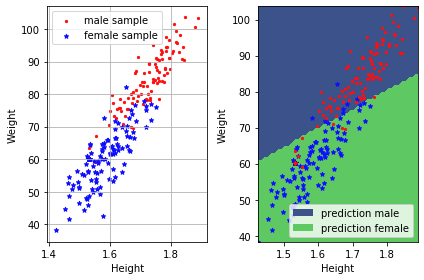

In [36]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    print(tx.shape)
    print(w.shape)

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    print(f"w={w}")

logistic_regression_gradient_descent_demo(y, x)

In [37]:
#test milos
# build tx
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))
w, loss = logistic_regression(y, tx,w, 1500, 0.01)
print(w)
print(loss)

[[ 0.23831217]
 [ 2.46228721]
 [-6.99291579]]
40.894827272895505


Calculate your Hessian below

In [60]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    S_vec = np.multiply(1-sigmoid(tx.dot(w)),sigmoid(tx.dot(w))).flatten()
    S = np.diag(S_vec)                               
    return tx.T.dot(S).dot(tx)


Write a function below to return loss, gradient, and Hessian.

In [61]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    loss = calculate_loss(y,tx,w)
    gradient = calculate_gradient(y,tx,w)
    hessian = calculate_hessian(y,tx,w)
    return loss,gradient,hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [62]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss,gradient, hessian = logistic_regression(y,tx,w)
    w = w - gamma* np.linalg.inv(hessian).dot(gradient)
    return loss, w

demo

Current iteration=0, the loss=[[138.62943611]]
Current iteration=1, the loss=[[63.41155374]]
Current iteration=2, the loss=[[47.3045862]]
Current iteration=3, the loss=[[41.99746742]]
Current iteration=4, the loss=[[40.95639864]]
Current iteration=5, the loss=[[40.89511994]]
Current iteration=6, the loss=[[40.89482562]]
Current iteration=7, the loss=[[40.89482561]]
loss=[[40.89482561]]


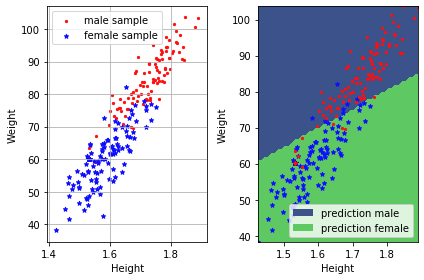

In [63]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    gamma = 1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [69]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient."""
    loss = calculate_loss(y,tx,w) + lambda_/2*w.T.dot(w)
    gradient = calculate_gradient(y,tx,w) + lambda_* np.sqrt(w.T.dot(w))*w
    return loss, gradient
    

In [78]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    
    w = w - gamma* gradient
    return loss, w

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[43.71149664]]
Current iteration=200, loss=[[41.91936649]]
Current iteration=300, loss=[[41.50636884]]
Current iteration=400, loss=[[41.37434045]]
Current iteration=500, loss=[[41.3234181]]
Current iteration=600, loss=[[41.30146049]]
Current iteration=700, loss=[[41.29137999]]
Current iteration=800, loss=[[41.28659537]]
Current iteration=900, loss=[[41.2842853]]
Current iteration=1000, loss=[[41.28316038]]
Current iteration=1100, loss=[[41.28261025]]
Current iteration=1200, loss=[[41.28234064]]
Current iteration=1300, loss=[[41.28220838]]
Current iteration=1400, loss=[[41.28214347]]
Current iteration=1500, loss=[[41.2821116]]
Current iteration=1600, loss=[[41.28209595]]
Current iteration=1700, loss=[[41.28208826]]
Current iteration=1800, loss=[[41.28208449]]
Current iteration=1900, loss=[[41.28208264]]
loss=[[41.06245326]]
 w =[[ 0.20974337]
 [ 2.04660652]
 [-6.30025434]]


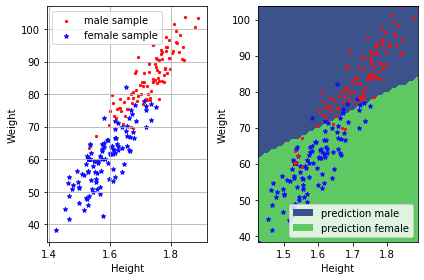

In [85]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.01
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    print(f" w ={w}")
logistic_regression_penalized_gradient_descent_demo(y, x)